**Resource Allocation Problem using Ant Colony Optimization**





*   There are a set of tasks that need to be assigned to a set of resources.
*   Each task can be assigned to one and only one resource.
*   The goal is to find the best assignment of tasks to resources while optimizing certain criteria.






In [ ]:
#Libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Our Objectives here are to maximize the resource utilization, minimize energy consumption and minimize response time**

In [ ]:
def initialize_ants(num_ants, num_tasks, num_resources):
    ants = np.random.rand(num_ants, num_tasks, num_resources)
    ants /= ants.sum(axis=2, keepdims=True)
    return ants

def update_pheromones(pheromone_levels, ants, evaporation_rate, quality_scores):
    pheromone_levels *= (1 - evaporation_rate)  # Evaporate pheromones
    for ant, quality in zip(ants, quality_scores):
        pheromone_deposit = quality / ant.sum(axis=1)[:, np.newaxis]  # Calculate the amount of pheromone to deposit
        pheromone_levels += ant * pheromone_deposit  # Deposit pheromone
    return pheromone_levels

def construct_solutions(pheromone_levels, num_ants, num_tasks, num_resources):
    new_solutions = np.zeros((num_ants, num_tasks, num_resources))
    for i in range(num_ants):
        for j in range(num_tasks):
            # Create a probability distribution based on pheromones
            probabilities = pheromone_levels[j] / pheromone_levels[j].sum()
            chosen_resource = np.random.choice(num_resources, p=probabilities)
            new_solutions[i, j, chosen_resource] = 1
    return new_solutions

def evaluate_solution(solution, resource_utilization_weight, energy_weight, response_time_weight):
    simulated_resource_utilization = np.random.uniform(0.7, 1.0)
    simulated_energy_consumption = np.random.uniform(0.1, 1.0)
    simulated_response_time = np.random.uniform(0.1, 1.0)

    normalized_resource_utilization = simulated_resource_utilization
    normalized_energy = 1 - simulated_energy_consumption
    normalized_response_time = 1 - simulated_response_time

    quality_score = (resource_utilization_weight * normalized_resource_utilization +
                     energy_weight * normalized_energy +
                     response_time_weight * normalized_response_time)
    return quality_score

# Sample parameters for demonstration
num_ants = 5
num_tasks = 3
num_resources = 2
evaporation_rate = 0.1
pheromone_levels = np.ones((num_tasks, num_resources))
resource_utilization_weight = 1/3
energy_weight = 1/3
response_time_weight = 1/3

quality_scores = []
for iteration in range(1, 6):
    ants = initialize_ants(num_ants, num_tasks, num_resources)
    # Evaluate all ants
    quality_scores = [evaluate_solution(ant, resource_utilization_weight, energy_weight, response_time_weight) for ant in ants]
    pheromone_levels = update_pheromones(pheromone_levels, ants, evaporation_rate, quality_scores)
    new_solutions = construct_solutions(pheromone_levels, num_ants, num_tasks, num_resources)

    # Output
    for idx, solution in enumerate(new_solutions):
        print(f"Iteration {iteration}, Ant {idx}")
        print("Solution:\n", solution)
        print("Quality Score:", quality_scores[idx])
        print("")


Iteration 1, Ant 0
Solution:
 [[1. 0.]
 [1. 0.]
 [1. 0.]]
Quality Score: 0.5405873211876621

Iteration 1, Ant 1
Solution:
 [[1. 0.]
 [1. 0.]
 [1. 0.]]
Quality Score: 0.5879537918898299

Iteration 1, Ant 2
Solution:
 [[1. 0.]
 [1. 0.]
 [0. 1.]]
Quality Score: 0.68724702679193

Iteration 1, Ant 3
Solution:
 [[0. 1.]
 [0. 1.]
 [0. 1.]]
Quality Score: 0.6730218405967621

Iteration 1, Ant 4
Solution:
 [[0. 1.]
 [1. 0.]
 [0. 1.]]
Quality Score: 0.5976985423799824

Iteration 2, Ant 0
Solution:
 [[1. 0.]
 [1. 0.]
 [0. 1.]]
Quality Score: 0.8078415575316099

Iteration 2, Ant 1
Solution:
 [[0. 1.]
 [1. 0.]
 [0. 1.]]
Quality Score: 0.6947568724295659

Iteration 2, Ant 2
Solution:
 [[0. 1.]
 [0. 1.]
 [0. 1.]]
Quality Score: 0.5839762711072427

Iteration 2, Ant 3
Solution:
 [[0. 1.]
 [0. 1.]
 [0. 1.]]
Quality Score: 0.5150394350628559

Iteration 2, Ant 4
Solution:
 [[0. 1.]
 [0. 1.]
 [0. 1.]]
Quality Score: 0.7089663002792157

Iteration 3, Ant 0
Solution:
 [[0. 1.]
 [0. 1.]
 [1. 0.]]
Quality Score:

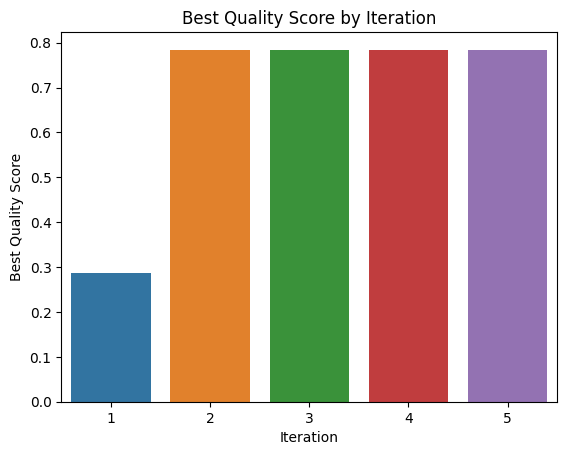

In [ ]:
iteration_numbers = list(range(1, 6))
best_scores_by_iteration = [max(quality_scores[:i+1]) for i in range(len(quality_scores))]
sns.barplot(x=iteration_numbers, y = best_scores_by_iteration )
plt.xlabel('Iteration')
plt.ylabel('Best Quality Score')
plt.title('Best Quality Score by Iteration')
plt.show()

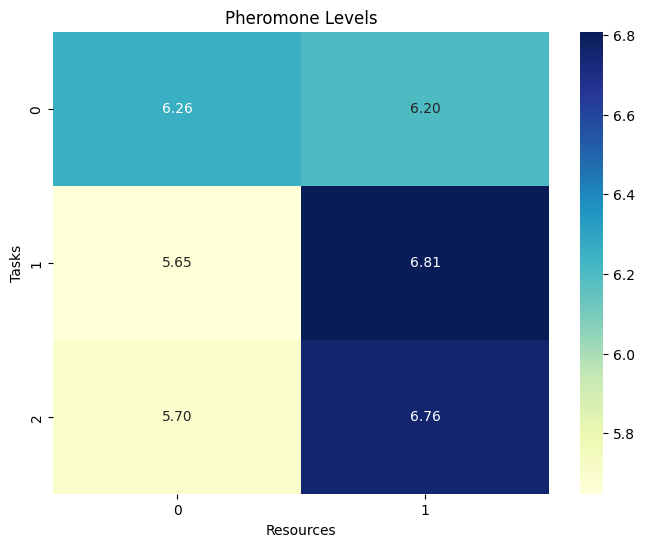

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(pheromone_levels, cmap='YlGnBu', annot=True, fmt=".2f", cbar=True)
plt.xlabel('Resources')
plt.ylabel('Tasks')
plt.title('Pheromone Levels')
plt.show()

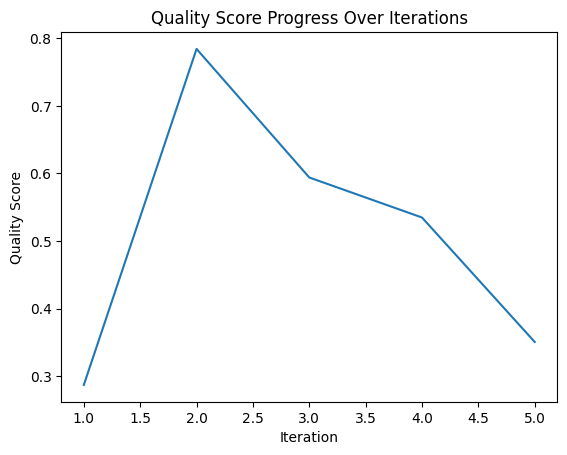

In [ ]:
iteration_numbers = range(1, 6)  # Assuming 5 iterations
sns.lineplot(x=iteration_numbers, y=quality_scores)
plt.xlabel('Iteration')
plt.ylabel('Quality Score')
plt.title('Quality Score Progress Over Iterations')
plt.show()